In [1]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import fcluster,dendrogram,linkage
import os

In [2]:
with open ('rmsd_result.txt') as f:
    rmsd = f.readlines()
mat = np.zeros((len(rmsd), len(rmsd)))
dist_map = []
for i in rmsd:
    odometry = i.split(',')
    for j in odometry:
        mat[rmsd.index(i)][odometry.index(j)] = j
        dist_map.append(j)

In [45]:
Z = sch.linkage(mat, method='average')
np.savetxt("Hierachica_clustering_result1.txt", Z, fmt = '%f', delimiter = ' ')
f = fcluster(Z, t=70, criterion='distance')
f

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 3, 3, 4,
       4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,

In [34]:
with open('../error_list/true_cavity_result_list.txt', 'r') as f:
    text = f.read()
pdb_ids = text.split(',')
pdb_ids = pdb_ids[:-1]


In [ ]:
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
ligand_cluster_1 = []
ligand_cluster_2 = []
ligand_cluster_3 = []
ligand_cluster_4 = []
for i in range(len(pdb_ids)):
    pdb_id = pdb_ids[i]
    os_listdir = os.listdir(f'../gett_pdb/{pdb_id}/{pdb_id}_mol2/ligand')
    for j in os_listdir:
        if j.endswith('.pdb'):
            ligand_name = j[-7:-4]
    if f[i] == 1:
        cluster_1.append(pdb_ids[i])
        if ligand_name not in ligand_cluster_1:
            ligand_cluster_1.append(ligand_name)
        elif ligand_name in ligand_cluster_1:
            print(ligand_name+' 1')
    elif f[i] == 2:
        cluster_2.append(pdb_ids[i])
        if ligand_name not in ligand_cluster_2:
            ligand_cluster_2.append(ligand_name)
        elif ligand_name in ligand_cluster_2:   
            print(ligand_name+' 2')
    elif f[i] == 3:  
        cluster_3.append(pdb_ids[i])
        if ligand_name not in ligand_cluster_3:
            ligand_cluster_3.append(ligand_name)
        elif ligand_name in ligand_cluster_3:
            print(ligand_name+' 3')
    elif f[i] == 4:
        cluster_4.append(pdb_ids[i])
        if ligand_name not in ligand_cluster_4:
            ligand_cluster_4.append(ligand_name)
        elif ligand_name in ligand_cluster_4:
            print(ligand_name+' 4')
    else:
        continue

In [ ]:
# YLM 4
# QYS 4
HUR 4  4次 苯并噻唑 抑制剂
FNO 4 3次 SARS coronavirus 3CL protease inhibitor
K36 4    18次 重复 GC376 
4WI 4    20次重复 辉瑞 PF-00835231共价化合物
# B1S 4
# X77 4
# TG3 4 3次
# SV6 4 3次
# J7R 4 3次
# YD1 4
# I12 4
# UYQ 3
# NOL 4
# XNV 4
# G65 4
# V2M 4
# AG7 4
# XNJ 4
# I70 4
# 1SQ 2
# AQO 2
# SAH 3
# QYJ 2
# WWH 2
# AR6 2 4次
# SAM 3 4次
# GTA 3
# ZU3 4
# GTP 1



In [58]:
print(len(cluster_1), len(cluster_2), len(cluster_3), len(cluster_4))
print(len(ligand_cluster_1), len(ligand_cluster_2), len(ligand_cluster_3), len(ligand_cluster_4))

5 261 25 289
4 255 19 228


In [59]:
for i in ligand_cluster_1:
    if i in ligand_cluster_2 or i in ligand_cluster_3 or i in ligand_cluster_4:
        print(i)
for i in ligand_cluster_2:
    if i in ligand_cluster_1 or i in ligand_cluster_3 or i in ligand_cluster_4:
        print(i)
for i in ligand_cluster_3:
    if i in ligand_cluster_1 or i in ligand_cluster_2 or i in ligand_cluster_4:
        print(i)
for i in ligand_cluster_4:
    if i in ligand_cluster_1 or i in ligand_cluster_2 or i in ligand_cluster_3:
        print(i)

HBD
G7L
5LH
HBD
G7L
5LH


In [41]:
with open('./cluster_1.csv', 'w') as f:
    for i in cluster_1:
        f.write(i+' ')
with open('./cluster_2.csv', 'w') as f:
    for i in cluster_2:
        f.write(i+' ')
with open('./cluster_3.csv', 'w') as f:
    for i in cluster_3:
        f.write(i+' ')
with open('./cluster_4.csv', 'w') as f:
    for i in cluster_4:
        f.write(i+' ')

In [43]:
print(len(cluster_1), len(cluster_2), len(cluster_3), len(cluster_4))

5 261 25 289


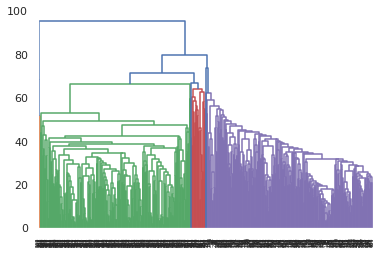

In [4]:
P = sch.dendrogram(Z)